In [11]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed값 설정하기
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)
# num_words = 1000은 빈도가 1~1000까지의 단어만 선택해서 불러오라는 뜻.

# 데이터 확인하기
category = np.max(y_train) + 1 # 0부터 세기때문에 1을 더해주기
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) # 첫번째 훈련용 뉴스기사 출력하기

# 11,228개의 뉴스기사가 46개의 카테고리로 나누어져있다.
# 토큰화과 정수 인코딩이 완료되어있음.
# 1이라는 숫자는 이 단어가 이 데이터에서 등장 빈도가 1등이라는 뜻임.

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
print(y_train[0])

3


In [4]:
# 각 기사의 단어 수가 각각 다르므로 동일하게 맞추는 작업이 필요

from keras.preprocessing import sequence

# 데이터 전처리하기, 패딩작업. 100자가 안되는 단어는 0으로 채워지고 100자가 넘으면 100까지 지정됨.
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)

In [7]:
x_train.shape

(8982, 100)

In [8]:
X_train.shape

(8982,)

In [9]:
X_test.shape

(2246,)

In [10]:
x_test.shape

(2246, 100)

In [12]:
# 데이터 전처리하기
# 활성화 함수 적용을 위하여 y 데이터에 원-핫 인코딩 처리하기
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [15]:
# 모델 설정하기
model = Sequential()
model.add(Embedding(1000, 100)) # 불러온 단어의 총 개수, 기사당 단어의 수. 모델설정 부분의 맨 처음에 있어야
model.add(LSTM(100, activation = 'tanh')) # 기사당 단어수, 기타옵션(활성화 함수 사용)
model.add(Dense(46, activation = 'softmax'))

# Embedding은 전처리 과정에서 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할을 함.
# LSTM은 RNN에서 기억 값에 대한 가중치 제어함.

In [16]:
# 모델 컴파일하기
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행하기
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data=(x_test, y_test))

# 테스트 정확도 출력하기
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/20
90/90 [==============================] - 12s 106ms/step - loss: 2.9644 - accuracy: 0.3269 - val_loss: 2.1629 - val_accuracy: 0.4786
Epoch 2/20
90/90 [==============================] - 9s 96ms/step - loss: 2.0599 - accuracy: 0.4763 - val_loss: 1.8477 - val_accuracy: 0.5254
Epoch 3/20
90/90 [==============================] - 9s 95ms/step - loss: 1.7813 - accuracy: 0.5345 - val_loss: 1.7405 - val_accuracy: 0.5508
Epoch 4/20
90/90 [==============================] - 8s 93ms/step - loss: 1.6707 - accuracy: 0.5684 - val_loss: 1.6795 - val_accuracy: 0.5779
Epoch 5/20
90/90 [==============================] - 9s 95ms/step - loss: 1.6816 - accuracy: 0.5601 - val_loss: 1.6572 - val_accuracy: 0.5748
Epoch 6/20
90/90 [==============================] - 8s 93ms/step - loss: 1.5842 - accuracy: 0.5937 - val_loss: 1.5885 - val_accuracy: 0.5810
Epoch 7/20
90/90 [==============================] - 9s 95ms/step - loss: 1.5427 - accuracy: 0.5923 - val_loss: 1.5389 - val_accuracy: 0.6037
Epoch 8/20


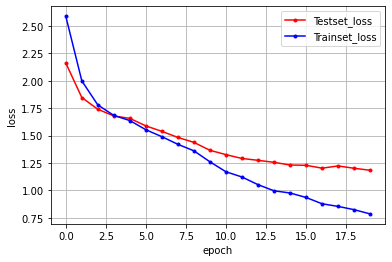

In [18]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
